In [1]:
import numpy as np
import math
from scipy import special as sp
from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
this_seed = 777

### making toy_data and visualize

In [3]:
import data_create
x, s = data_create.make_toy_data(print_option=True, my_seed=this_seed)

sampling π
[0.54884155 0.30026895 0.15088949] 

sampling A[:,i]
[[0.80802924 0.17082397 0.10644739]
 [0.10504416 0.76880479 0.0807838 ]
 [0.08692659 0.06037124 0.81276881]] 

sampling λ
[11.621397528004486, 30.44740230764582, 46.97873112667207] 



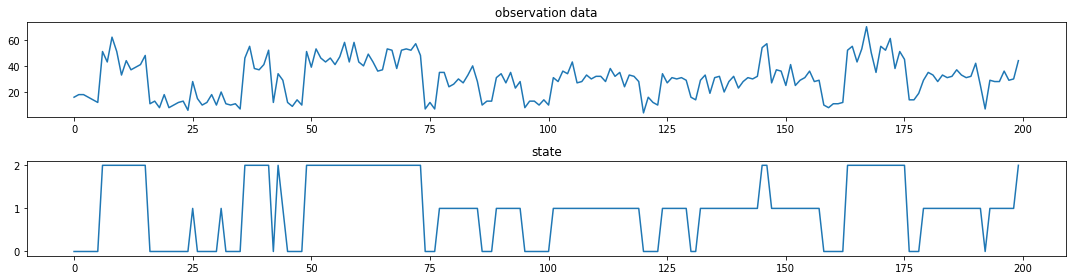

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 4))
ax[0].plot(x)
ax[0].set_title("observation data")

ax[1].plot(s)
ax[1].set_title("state")
plt.tight_layout();

### Inference 

#### Poisson Mixture Model

In [5]:
import Poisson_Mixture_Model_by_VI as PMM
iter_num=30
s_predict_by_PMM = PMM.predict_s(x, K=3, iter_num=iter_num, my_seed=this_seed)
max_s_predict_by_PMM = np.argmax(s_predict_by_PMM, axis=1)

#### Hidden Markov Model with Poisson Observation Model

In [6]:
import HMM_Poisson_by_structured_VI as HMM
iter_num=30
s_predict_by_HMM = HMM.predict_s(x, K=3, iter_num=iter_num, my_seed=this_seed)
max_s_predict_by_HMM = np.argmax(s_predict_by_HMM, axis=1)

### Result Inference by HMM

HMM accuracy：　 0.945


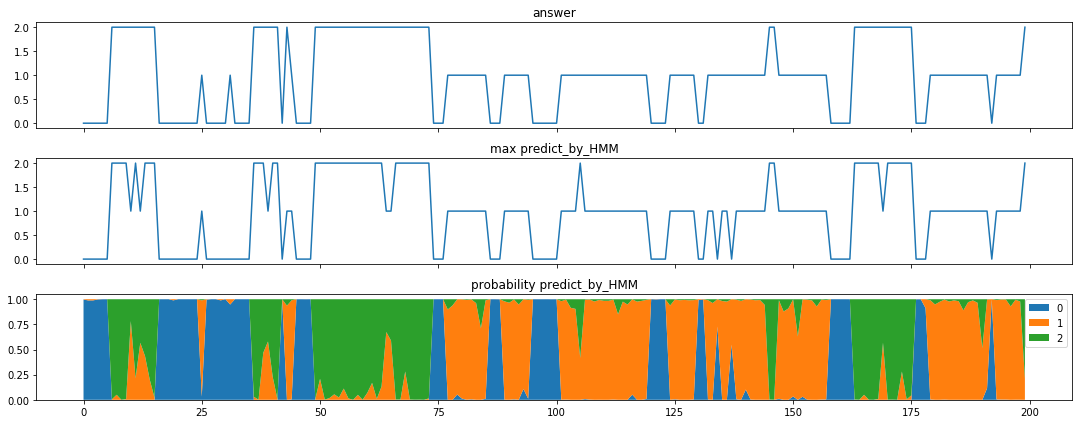

In [7]:
fig, ax = plt.subplots(nrows=3, figsize=(15, 6), sharex=True)

HMM_accuracy = np.sum(s==max_s_predict_by_HMM)/len(x)
print('HMM accuracy：　',HMM_accuracy)

ax[0].plot(s)
ax[0].set_title("answer")

ax[1].plot(max_s_predict_by_HMM)
ax[1].set_title("max predict_by_HMM")

ax[2].stackplot(range(len(s_predict_by_HMM)), s_predict_by_HMM.T, labels = ["0", "1", "2"])
ax[2].set_title("probability predict_by_HMM")
ax[2].legend()

plt.tight_layout();

### Comparion Inference result between PMM and HMM

PMM accuracy：　 0.9
HMM accuracy：　 0.945


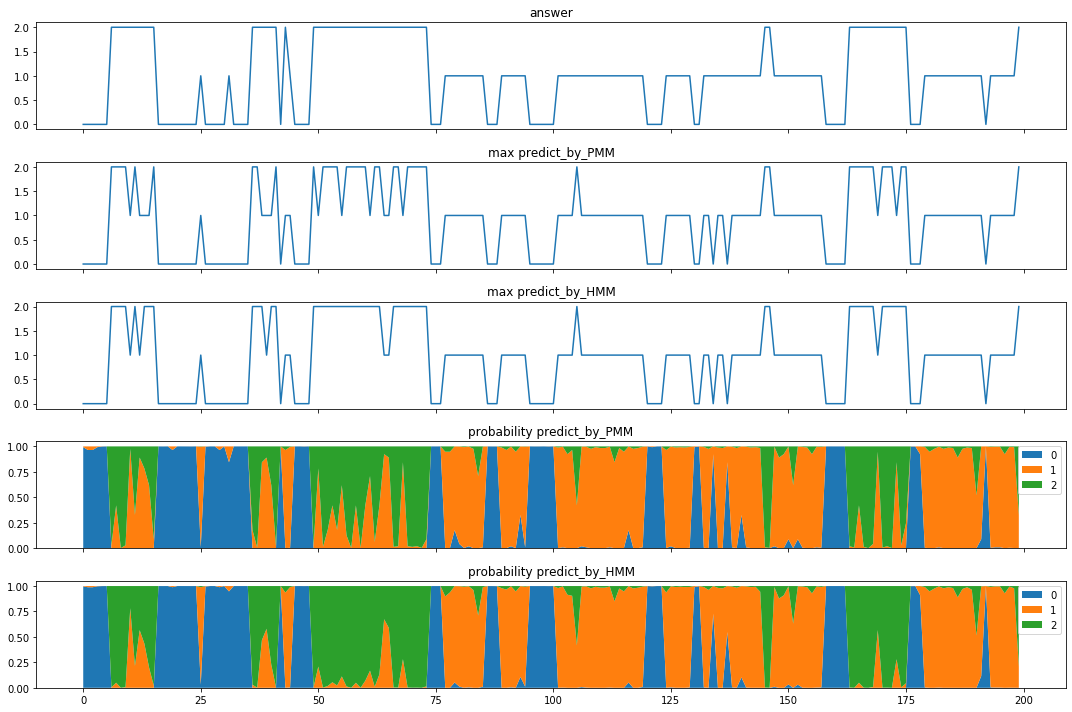

In [8]:
fig, ax = plt.subplots(nrows=5, figsize=(15, 10), sharex=True)

PMM_accuracy = np.sum(s==max_s_predict_by_PMM)/len(x)
print('PMM accuracy：　',PMM_accuracy)

HMM_accuracy = np.sum(s==max_s_predict_by_HMM)/len(x)
print('HMM accuracy：　',HMM_accuracy)

ax[0].plot(s)
ax[0].set_title("answer")

ax[1].plot(max_s_predict_by_PMM)
ax[1].set_title("max predict_by_PMM")

ax[2].plot(max_s_predict_by_HMM)
ax[2].set_title("max predict_by_HMM")


ax[3].stackplot(range(len(s_predict_by_PMM)), s_predict_by_PMM.T, labels = ["0", "1", "2"])
ax[3].set_title("probability predict_by_PMM")
ax[3].legend()

plt.tight_layout();

ax[4].stackplot(range(len(s_predict_by_HMM)), s_predict_by_HMM.T, labels = ["0", "1", "2"])
ax[4].set_title("probability predict_by_HMM")
ax[4].legend()

plt.tight_layout();

### Comparison PMM and HMM with lambdas value closing for touch

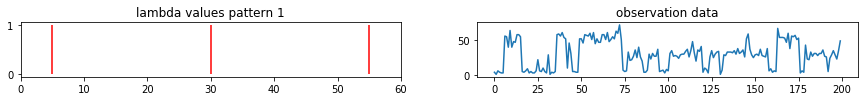

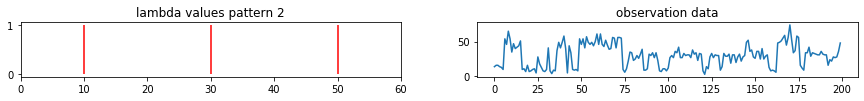

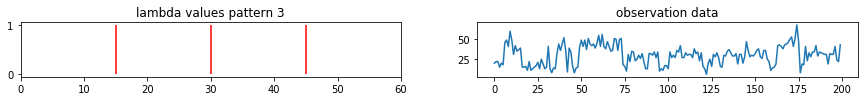

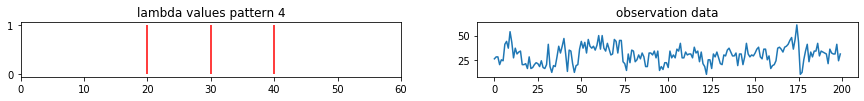

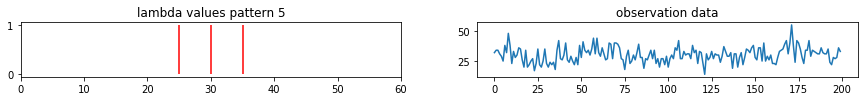

In [9]:
PMM_accuracy_list = []
HMM_accuracy_list = []

lambdas_list = [[5 + i*5, 30, 55-i*5] for i in range(5)]

for pattern, lambdas in enumerate(lambdas_list):
    
    x, s = data_create.make_toy_data(expriment_mode=True, lambdas_input=lambdas, my_seed=this_seed)
    
    fig, ax = plt.subplots(ncols=2, figsize=(15, 1))
   
    ax[0].vlines(lambdas, *ax[0].get_ylim(), color='red')
    ax[0].set_xlim(0, 60)
    ax[0].set_title('lambda values pattern {}'.format(pattern+1), fontsize=12)
    
    ax[1].plot(x)
    ax[1].set_title("observation data", fontsize=12)
    
    
    s_predict_by_PMM = PMM.predict_s(x, K=3, iter_num=30, my_seed=this_seed)
    max_s_predict_by_PMM = np.argmax(s_predict_by_PMM, axis=1)

    s_predict_by_HMM = HMM.predict_s(x, K=3, iter_num=30, my_seed=this_seed)
    max_s_predict_by_HMM = np.argmax(s_predict_by_HMM, axis=1)

    PMM_accuracy = np.sum(s==max_s_predict_by_PMM)/len(x)
    HMM_accuracy = np.sum(s==max_s_predict_by_HMM)/len(x)
    PMM_accuracy_list.append(PMM_accuracy)
    HMM_accuracy_list.append(HMM_accuracy)

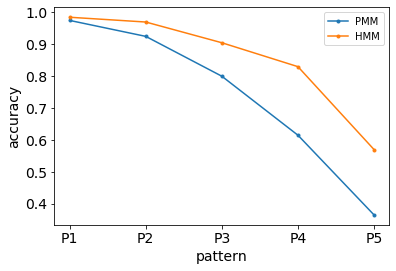

In [10]:
plt.plot(np.arange(1,len(PMM_accuracy_list)+1), PMM_accuracy_list, label="PMM", marker='.')
plt.plot(np.arange(1,len(HMM_accuracy_list)+1), HMM_accuracy_list, label="HMM", marker='.')
plt.xticks(ticks=np.arange(1,len(HMM_accuracy_list)+1), labels=['P{}'.format(i+1) for i in range(len(PMM_accuracy_list))], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('pattern', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

plt.legend();